

# Project: Investigate a Dataset - No-show appointments
## By: Jaclyn Tobin

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset contains over 100,000 medical appointments in Brazil with characteristics about the patient and appointment; including if the patient showed up for their appointment. There are 14 columns in this dataset:

<li>PatientId- Patient record number.
<li>AppointmentId- Identification of each appointment.
<li>Gender- Male or Female. 
<li>ScheduledDay- Day the appointment was scheduled.
<li>AppointmentDay- Day of appointment.
<li>Age- How old is the patient
<li>Neighbourhood- Where the appointment takes place.
<li>Scholarship-indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. True of False . 
<li>Hipertension-True or False.
<li>Diabetes- True or False.
<li>Alcoholism- True or False.
<li>Handcap-True or False.
<li>SMS_received- 1 or more messages sent to the patient.
<li>No-show- True or False. 


### Question(s) for Analysis

What varibles contribute to a patient not showing up for a scheduled appointment?

<li>Dependent varible- No Show
<li>Independent varibles- Gender, Age, ScheduledDay, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_recieved

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [45]:
#First I will look for any null values or missing information.
#I will also check to see if the data types are appropriate for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
#This loop will allow me to see the value counts of each column. 
#I will try to find any erroneous data.

for col in df.columns:
    print(df[col].value_counts())


#### Data Wrangling- Initial impression
> <li>The data set appears very clean with consistant column name formatting.
> <li>110527 values in each column and no nulls.
><li>PatientId count shows as many as 88 appointments per ID. All appointment id's are unique.
><li>AppointmentDay and ScheduledDay data type is object.
><li>Age has an entry as -1.
><li>Handcap has 5 outputs: 0-4



### Data Cleaning

In [47]:
#Remove columns I will not be using in analysis
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [48]:
#Find and delete the row with Age of -1

df.drop(df.loc[df['Age'] == -1].index, inplace = True)

df.shape

(110526, 12)

In [49]:
#Change ScheduledDay and AppointmentDay to dates

df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).apply(lambda x: x.date())
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.date())

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Below, I would like to explore the varible of Wait Time. This would be the time between the day the appointment was scheduled and the day of the appointment. 

In [50]:
#Create a new column with the difference between ScheduledDay and AppointmentDay
df['WaitTime']= (df['AppointmentDay']-df['ScheduledDay']).dt.days

In [ ]:
df.sort_values(by='WaitTime')

Now that I have a Wait Time (days) column I need to get rid of rows with any negative numbers since it is not logical to schedule the appointment after your appointment date.

In [52]:
#Drop rows with negative value in Wait Time
df.drop(df.loc[df['WaitTime'] == -1].index, inplace = True)
df.drop(df.loc[df['WaitTime'] == -6].index, inplace = True)

In [ ]:
#Check to see if negative values in Wait Time are gone
df.sort_values(by='WaitTime')

Below, I will change Yes=1 and No=0 in the No-Show column. This way during analysis I can calculate correlations utilizing the No-Show column.

In [54]:
#Change Yes=1 and No=0 in the No-Show column
df['No-show'] = df['No-show'].replace({'Yes': 1, 'No' : 0})

In [55]:
#Check to see if values changed
df['No-show'].value_counts()

0    88207
1    22314
Name: No-show, dtype: int64

In [56]:
df['No-show'].dtypes

dtype('int64')

In [57]:
#Masks for show and no-show
Show = df['No-show']== 0
NoShow = df['No-show'] == 1

df[NoShow].head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,3
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,1
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,2


<a id='eda'></a>
## Exploratory Data Analysis


# What varibles contribute to a patient not showing up for a scheduled appointment?

In [58]:
#Correlation of vairbles 
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
Age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,-0.060320,0.034813
Scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,0.029166,-0.030435
Hipertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,-0.035662,-0.017236
Diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,-0.015158,-0.027200
Alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,-0.000181,-0.038527
Handcap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,-0.006290,-0.019774
SMS_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,0.126502,0.398128
No-show,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.006290,0.126502,1.000000,0.186320
WaitTime,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.019774,0.398128,0.186320,1.000000


Above, there are no strong correlations between one specific varible and the No-Show column. 

In [59]:
#Function for barplot 
def barplot(column, title, xlabels):
    fig = plt.subplots(figsize =(12, 8))

    barWidth = 0.25
    br1 = np.arange(2)
    br2 = [x + barWidth for x in br1]

    noshows = df[NoShow][column].value_counts(normalize=True)
    shows = df[Show][column].value_counts(normalize=True)

    plt.bar(br1, shows, color ='g', width = barWidth,
            edgecolor ='grey', label ='Shows')
    plt.bar(br2, noshows, color ='b', width = barWidth,
            edgecolor ='grey', label ='NoShows')

    plt.xticks([r + barWidth/2 for r in range(2)],
            xlabels)
    plt.ylabel('Percentage of appointments', fontweight ='bold', fontsize = 15)
    plt.title(title, fontweight ='bold', fontsize = 15)
    plt.legend()

plt.show()

In [60]:
#Gender
print("Show = ",df.Gender[Show].value_counts())
print("No-Show = ",df.Gender[NoShow].value_counts())

Show =  F    57245
M    30962
Name: Gender, dtype: int64
No-Show =  F    14591
M     7723
Name: Gender, dtype: int64


Percentage of No-Show per Gender
<li>Female= 14594/71839= 0.203 = 20%
<li>Male = 7725/38687= 0.199 = 20%
  
Almost identical No-Show precentagess from male and female patients.

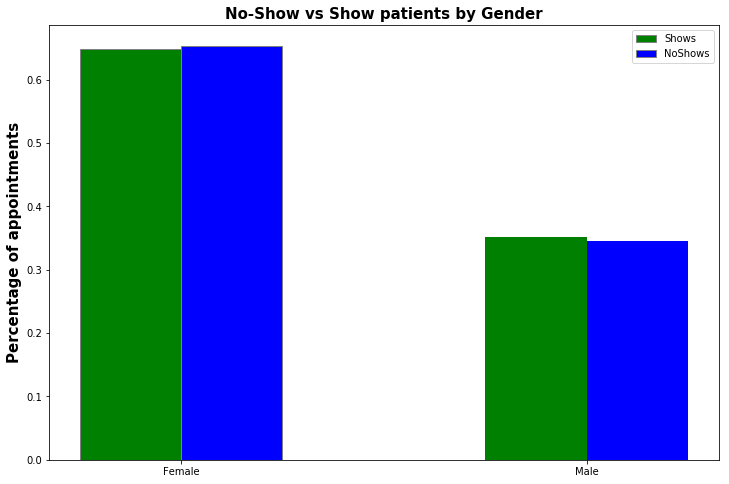

In [61]:
#Bar graph of No-shows vs Show patients by Gender
barplot('Gender', 'No-Show vs Show patients by Gender', ['Female','Male'])

In [62]:
#Age
print("Show = ",df.Age[Show].mean())
print("No-Show = ",df.Age[NoShow].mean())

Show =  37.790504155
No-Show =  34.3178721879


No-Show average age 
<li>Show= 38
<li>No-Show= 34
  
No-Show age is slightly lower than the age of patients who made their appointments. 

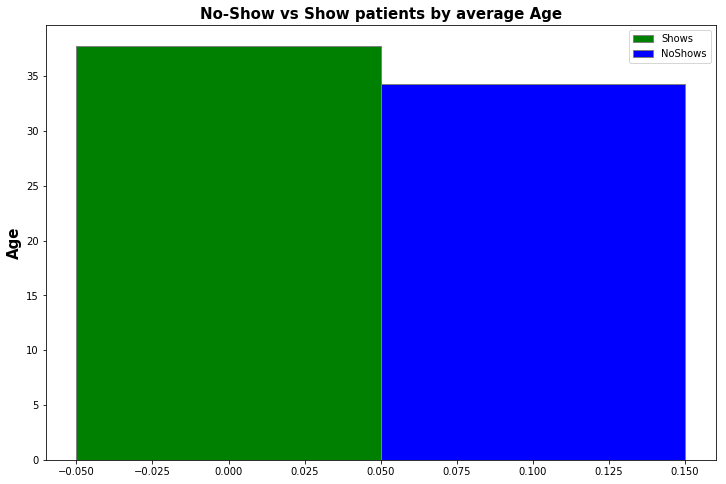

In [63]:
#Bar Graph of no-show vs show patients by average age
fig = plt.subplots(figsize =(12, 8))

barWidth = 0.1
br1 = np.arange(1)
br2 = [x + barWidth for x in br1]

noshows = df[NoShow].Age.mean()
shows = df[Show].Age.mean()

plt.bar(br1, shows, color ='g', width = barWidth,
        edgecolor ='grey', label ='Shows')
plt.bar(br2, noshows, color ='b', width = barWidth,
        edgecolor ='grey', label ='NoShows')

plt.ylabel('Age', fontweight ='bold', fontsize = 15)
plt.title('No-Show vs Show patients by average Age', fontweight ='bold', fontsize = 15)
plt.legend()

plt.show()

In [64]:
#Text recieved
print("Show = ",df.SMS_received[Show].value_counts())
print("No-Show = ",df.SMS_received[NoShow].value_counts())

Show =  0    62509
1    25698
Name: SMS_received, dtype: int64
No-Show =  0    12530
1     9784
Name: SMS_received, dtype: int64


Percentage of No-Show with text message
<li> Show = 25698/88207= 0.291 = 29% patients who showed up received a text
<li> No-Show = 9784/22319 = 0.438 = 43% patients who no-showed recieved a text
    
This finding seems not to fit what I would expect. 43% of the no-show patients recieved a text compared to 30% of patients who showed up and recieved a text. 

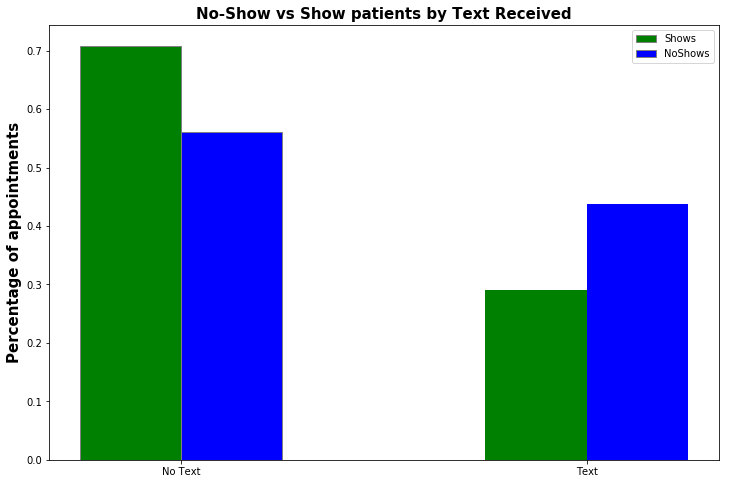

In [65]:
barplot('SMS_received', 'No-Show vs Show patients by Text Received',['No Text','Text'])

The chart above shows the patients who did not recieve a text message were more likly to show up to their appointment. I can only assume there may be another factor at play here. 

In [66]:
#WaitTime
print("Show = ",df.WaitTime[Show].mean(), " days")
print("No-Show = ",df.WaitTime[NoShow].mean(), " days")

Show =  8.75475869262  days
No-Show =  15.8354844492  days


The histagram showing No-Show WaitTime (1), has a more positive skew indicating a relationship between longer wait times and no show rates.

In [67]:
import matplotlib
matplotlib.__version__

'2.1.0'

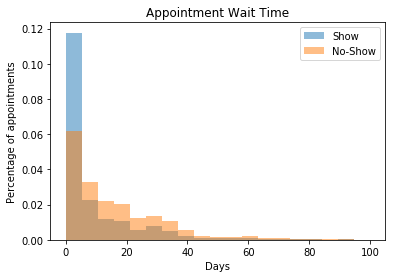

In [68]:
#Histagram with Show and No-show vs wait time 
x = df.WaitTime[Show]
y = df.WaitTime[NoShow]

bins = np.linspace(0, 100, 20)

plt.hist(x, bins, alpha=0.5, label='Show', normed=True)
plt.hist(y, bins, alpha=0.5, label='No-Show', normed=True)
plt.legend(loc='upper right')
plt.title("Appointment Wait Time")
plt.xlabel("Days")
plt.ylabel("Percentage of appointments")
plt.show()

In [ ]:
#Neighbourhoods
#Creating a dataframe to analyze neighbourhood data. Including the sum of No-Shows, total appointment count, and percentage of No-Shows.

df2=df.groupby('Neighbourhood').agg({'No-show':['mean','sum','count']}).reset_index()
df2.columns=['Neighbourhood', 'Mean', 'Sum', 'Count']
df2

In [70]:
#Finding the top 5 highest no-show percentages by neighbourhood
print(df2.nlargest(5, 'Mean'))

#Finding the top 5 highest no-show counts by neighbourhood
print(df2.nlargest(5, 'Sum'))


                  Neighbourhood      Mean  Sum  Count
34  ILHAS OCEÂNICAS DE TRINDADE  1.000000    2      2
70                SANTOS DUMONT  0.289185  369   1276
61                SANTA CECÍLIA  0.274554  123    448
62                  SANTA CLARA  0.264822  134    506
36                      ITARARÉ  0.262664  923   3514
     Neighbourhood      Mean   Sum  Count
38  JARDIM CAMBURI  0.189841  1465   7717
43     MARIA ORTIZ  0.209991  1219   5805
36         ITARARÉ  0.262664   923   3514
59     RESISTÊNCIA  0.204289   905   4430
10          CENTRO  0.210858   703   3334


In [71]:
#Average percentage and count of No-Show for all neighbourhoods
print("Mean = ", df2['Mean'].mean())
print("Sum = ",df2['Sum'].mean())

Mean =  0.205407591271
Sum =  275.481481481


#### Top 3 No-Show Percentages by Neighbourhood:
<li>SANTOS DUMONT   29% 
<li>SANTA CECÍLIA    27%
<li>SANTA CLARA       26%

<li>*ILHAS OCEÂNICAS DE TRINDADE  100%  but with only 2 appointments total
    
    Average No-Show Percentage= 21%
    
#### Top 3 Most appointments missed Neighbourhood:
<li>JARDIM CAMBURI    1465   
<li>MARIA ORTIZ    1219   
<li>ITARARÉ       923 
    
    Average missed appoinments= 275

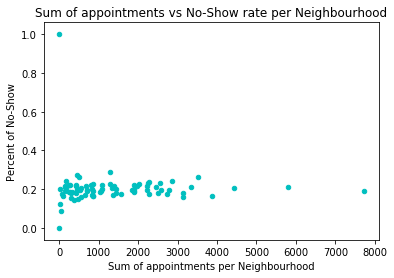

In [72]:
#Scatterplot for sum of appointments vs no-show rate per neighbourhood
fig, ax = plt.subplots()
df2.plot(kind='scatter',x='Count', y='Mean', c='C', ax=ax)
ax.set_xlabel("Sum of appointments per Neighbourhood")
ax.set_ylabel("Percent of No-Show")
ax.set_title("Sum of appointments vs No-Show rate per Neighbourhood")
plt.show()

The scatterplot above shows how even the neighbourhoods with more appointments (presumably larger neighbourhoods) have roughly the same percentage of no-shows.   

In [73]:
#Day of week
df['Dayofweek']=pd.to_datetime(df.AppointmentDay).dt.day_name()

In [74]:
#Day of week percentage of No-shows
df.groupby('Dayofweek').agg({'No-show':['mean','count']})

No-show       
               mean  count
Dayofweek                 
Friday     0.212261  19019
Monday     0.206446  22713
Saturday   0.230769     39
Thursday   0.193494  17246
Tuesday    0.200874  25638
Wednesday  0.196861  25866

Based on the chart above it does not appear that any particular day of the week has a much larger No-show rate than an other. It does show us that no appointments were made on Sundays and very few on Saturday which does have the slightly largest no-show rate of 23%.

<a id='conclusions'></a>
## Conclusions

> **What varibles contribute to a patient not showing up for a scheduled appointment?**: 



<li>Based on my analysis, the patient's Wait Time between scheduling and attending their appointment seems to make a difference in the no-show rate. The average Wait Time for patients who showed up to their appointments was about 9 days compared to an average of 16 days for those who did not show. If we are looking to decrease no-show rates considering shorter Wait Times may be an effective intervention. 
<br/> <br/> 
<li> Another varible that may contribute to not showing up for an appointment is Age. The average age for those who showed up was 38 years old compared to 34 years old for those who did not show. There did not appear to be any diffference in Gender as male and female each had a no-show rate of about 20%
<br/> <br/> 
<li>This analysis shows which neighbourhood the patient is in had an impact on no-show rate. The average no-show rate is 21% across all neighbourhoods with these as the top 3 neighourhoods with the highest no-show rates: 
<br/>    1. ANTOS DUMONT   29% 
  <br/>   2. SANTA CECÍLIA    27%
  <br/>   3. SANTA CLARA       26%
<br/> 
*ILHAS OCEÂNICAS DE TRINDADE  100%  but with only 2 appointments total
    <br/> 
  We could do further analysis on these areas to see if these patients have additional barriers to makeing their scheduled appointments. 
<br/> 
    
> **Limitation**

<li>A limitation of this data is patient transportation. We do not know how patients are getting to and from their appointments or even how far they live from the location of their appointment. 
<br/> <br/>
<li>The findings also showed the patients who did not recieve a text message were more likly to show up to their appointment. I can only assume there may be another factor at play here. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])